In [234]:
import numpy as np
import numpy.fft as fft
import xarray as xr
import matplotlib.pyplot as plt
import cmocean as cm
from scipy.signal import convolve2d

import pyqg
from pyqg import diagnostic_tools as tools

colors = [(0.33725, 0.70588, 0.91373),
          (0.90196, 0.62353, 0.00000),
          (0.00000, 0.61961, 0.45098),
          (0.94118, 0.89412, 0.25882),
          (0.00000, 0.44706, 0.69804),
          (0.83529, 0.36863, 0.00000),
          (0.80000, 0.47451, 0.65490)]

#### Defining rough topography

In [232]:
def zero_mean_bump(h, n, L, xx, yy):
    
    return h * np.sin(2*n * np.pi / L * xx) * np.sin(2*n * np.pi / L * yy)

def non_zero_mean_bump(h, n, L, xx, yy):
    
    c = 1.
    
    return h * (np.cos(2*n * np.pi / L * c * xx) + np.sin(2*n * np.pi / L * c * yy))

L = 64.

x = np.linspace(0., L, 101)
y = np.linspace(0., L, 101)
xx, yy = np.meshgrid(x, y)

zero_mean_bumps = zero_mean_bump(1, 3, L, xx, yy)
non_zero_mean_bumps = non_zero_mean_bump(1, 3, L, xx, yy)

In [235]:
np.zeros((128, 128))

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

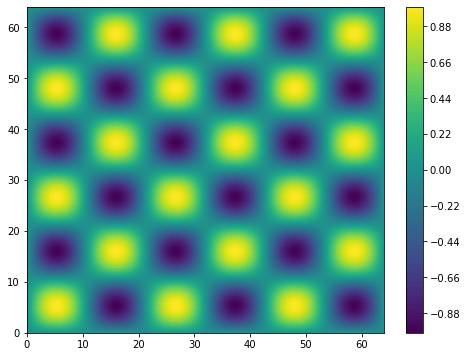

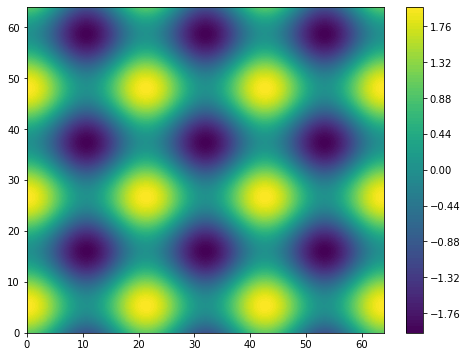

In [233]:
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, zero_mean_bumps, levels=100)
plt.colorbar()

plt.figure(figsize=(8,6))
plt.contourf(xx, yy, non_zero_mean_bumps, levels=100)
plt.colorbar()

#### Fourier transforming the topography

In [223]:
k = 2 * np.pi / L * fft.fftfreq(x.size, 1/x.size)
l = 2 * np.pi / L * fft.fftfreq(x.size, 1/x.size)

kk, ll = np.meshgrid(k, l)

h = zero_mean_bump(1, 6, L, xx, yy)
hhat = fft.fft2(h)

ll * hhat

test = convolve2d(ll, hhat)

In [224]:
test

array([[ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j],
       [ 2.90882783e-16+8.51104630e-16j,  8.53574068e-16+6.71261410e-16j,
         1.00889321e-15+5.29566753e-16j, ...,
         2.16356843e-15+1.20767447e-14j, -2.77939521e-16-1.30795069e-16j,
         6.81224316e-18-7.30272467e-16j],
       [ 6.44824103e-16+1.09917059e-15j, -1.33661245e-02-8.32577654e-04j,
        -5.54959416e-02-4.77535681e-03j, ...,
         1.87141727e+00-1.14418129e-01j,  5.56854723e-02-1.31595678e-03j,
         1.33920301e-02-2.43307780e-15j],
       ...,
       [-7.34821892e-15-5.43273348e-15j, -1.94049477e+00+1.15734086e-01j,
        -8.08015426e+00+2.90553410e-01j, ...,
         2.67619300e+02-4.94854285e+01j,  8.00005020e+00-1.17154210e+00j,
         1.92954592e+00-2.36150066e-01j],
       [-1.47280733e-15+8.15066393e-16j, -6.